# Exploratory Sales Analysis - Beginner Level Task 1
CSV files in working directory:
- train.csv, transactions.csv, holidays_events.csv, oil.csv, sample_submission.csv, stores.csv, test.csv
##### This notebook covers:
- Loading and cleaning the dataset with Pandas
- Generating descriptive statistics (mean, median, mode)
- Visualizing sales over time using line and bar charts
- Practicing basic data cleaning and summary statistics


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
sns.set(style='whitegrid')

# Load dataset
train = pd.read_csv('train.csv', parse_dates=['date'])
print('Train dataset loaded successfully!')
print('Shape:', train.shape)

# Preview dataset
train.head()

# Check data info to understand column types and missing values
train.info()

# Check for missing values
missing_values = train.isna().sum()
missing_values[missing_values > 0]

# Basic cleaning
# Drop duplicates if there's any
train = train.drop_duplicates()

# Fill missing numeric columns with median
numeric_cols = train.select_dtypes(include=[np.number]).columns
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].median())

print('Data cleaned successfully!')

# Generate descriptive statistics: mean, median, mode for numeric columns
mean_values = train.mean(numeric_only=True)
median_values = train.median(numeric_only=True)
mode_values = train.mode(numeric_only=True).iloc[0]

print('--- MEAN ---')
print(mean_values)
print('\n--- MEDIAN ---')
print(median_values)
print('\n--- MODE ---')
print(mode_values)

Train dataset loaded successfully!
Shape: (3000888, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB
Data cleaned successfully!
--- MEAN ---
id             1.500444e+06
store_nbr      2.750000e+01
sales          3.577757e+02
onpromotion    2.602770e+00
dtype: float64

--- MEDIAN ---
id             1500443.5
store_nbr           27.5
sales               11.0
onpromotion          0.0
dtype: float64

--- MODE ---
id             0.0
store_nbr      1.0
sales          0.0
onpromotion    0.0
Name: 0, dtype: float64


## Sales Visualization
Visualize total sales over time using line and bar charts

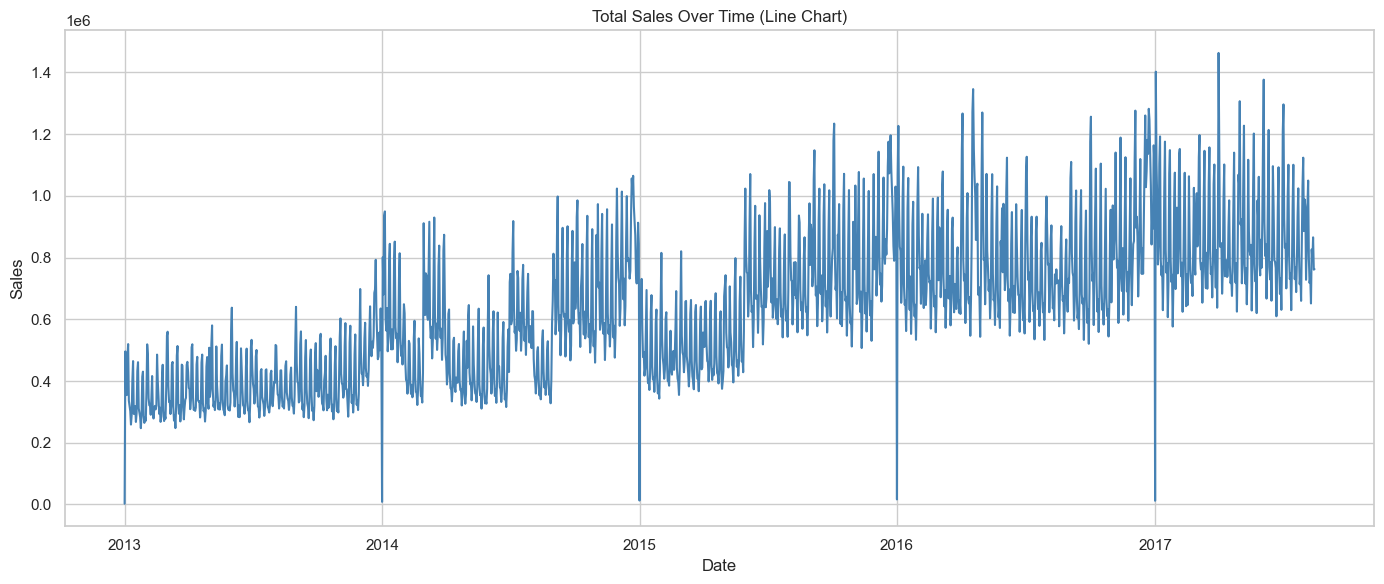

In [2]:
# Aggregate sales by date
daily_sales = train.groupby('date')['sales'].sum().reset_index()

# Line chart for daily sales
plt.figure(figsize=(14,6))
plt.plot(daily_sales['date'], daily_sales['sales'], color='steelblue')
plt.title('Total Sales Over Time (Line Chart)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

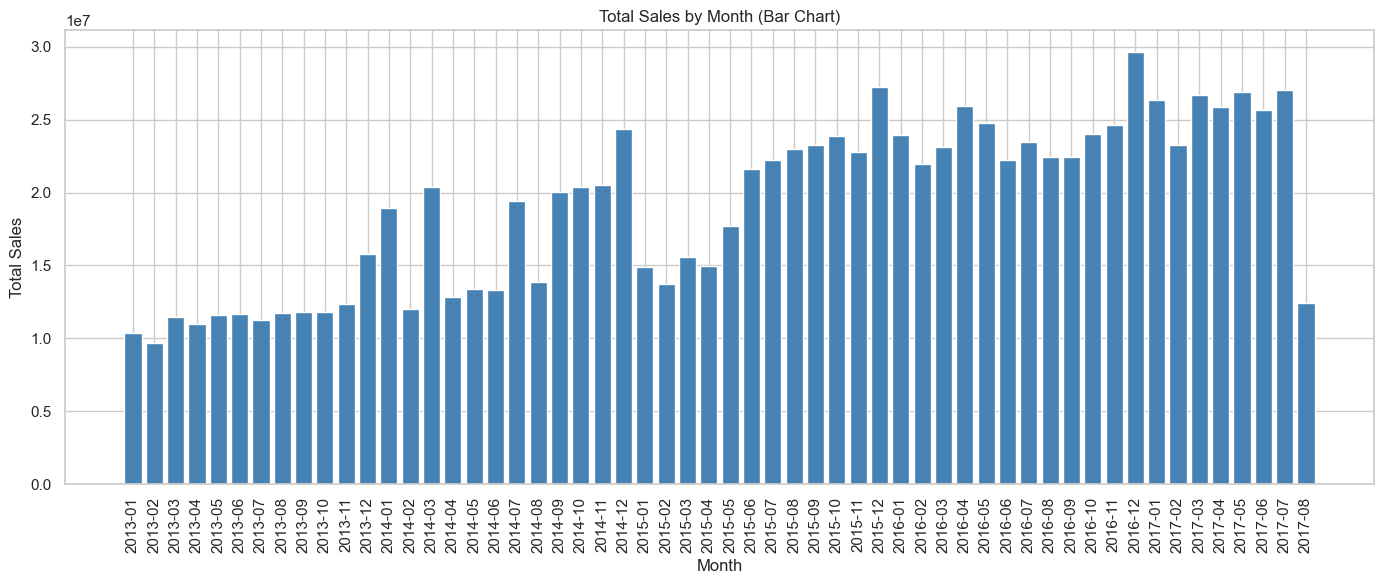

In [8]:
# Bar Chart for Monthly Total Sales

# Ensure the 'sales' column exists
if 'sales' not in train.columns:
    print("Error: 'sales' column not found. Check the dataset column names:")
    print(train.columns)
else:
    # Create month-year column for grouping
    train['year'] = train['date'].dt.year
    train['month'] = train['date'].dt.month

    monthly_sales = (
        train.groupby(['year', 'month'], as_index=False)['sales'].sum().sort_values(['year', 'month']))
    
    # Combine into a single 'year-month' string for x-axis
    monthly_sales['year_month'] = (
        monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)
    )

    # Plot
    plt.figure(figsize=(14,6))
    plt.bar(monthly_sales['year_month'], monthly_sales['sales'], color='steelblue')
    plt.title('Total Sales by Month (Bar Chart)')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


## Summary
In this analysis, we:
- Loaded and cleaned the dataset with Pandas.
- Checked and handled missing values.
- Generated descriptive statistics (mean, median, mode).
- Visualized sales trends over time using line and bar charts.

**Tech Stack:** Python, Pandas, NumPy, Matplotlib, Seaborn. 
**Dataset:** [Store Sales Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-seriesforecasting)
